In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000, n_features=10, n_clusters_per_class=1,random_state=42)

In [4]:
X

array([[ 1.37605307, -1.60766103, -0.8351429 , ...,  0.15175799,
         0.18474058,  2.08953872],
       [-0.00579492,  1.67134758, -0.1761335 , ..., -0.38796497,
        -0.90137568, -2.89951388],
       [ 2.02384752,  0.0827729 ,  1.95983725, ...,  1.09898336,
         0.03678283,  0.45061305],
       ...,
       [ 2.72615082,  0.21060084, -0.08091734, ..., -0.30356433,
        -0.48847608, -3.17042574],
       [ 0.07128152,  0.6032475 ,  0.22899639, ..., -0.7331562 ,
         0.29815847, -1.85790145],
       [ 1.66188355, -0.63045845,  0.09131473, ...,  2.15912115,
         1.63708241, -0.3804559 ]], shape=(1000, 10))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 10), (300, 10), (700,), (300,))

## logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.93      0.91      0.92       144

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[146  10]
 [ 13 131]]


## hyper parameter in logistic regression

In [9]:
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
solver = ['lbfgs', 'newton-cg', 'sag', 'saga']
c=[0.01, 0.1, 1, 10, 100]

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
params = {
    'penalty': penalty,
    'solver': solver,
    'C': c,
}

In [12]:
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5,n_jobs=-1)

In [13]:
grid.fit(X_train, y_train)

C:\Users\HP-PC\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
175 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP-PC\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP-PC\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\HP-PC\AppData\Roaming\Python\Python313\site

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             scoring='accuracy')

In [14]:
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_:.2f}")

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.90


In [15]:
y_pred = grid.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       156
           1       0.90      0.90      0.90       144

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

[[142  14]
 [ 14 130]]


## Randomized search Cv

In [17]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='accuracy', cv=5, n_jobs=-1,random_state=42,n_iter=40)

In [19]:
randomcv.fit(X_train, y_train)

C:\Users\HP-PC\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
105 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP-PC\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP-PC\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\HP-PC\AppData\Roaming\Python\Python313\site

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'newton-cg', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [20]:
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_:.2f}")

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.90


In [21]:
y_pred = randomcv.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.93      0.91      0.92       144

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[146  10]
 [ 13 131]]


## logictic Cv

In [23]:
from sklearn.linear_model import LogisticRegressionCV
modelcv = LogisticRegressionCV(cv=5, random_state=42)

In [24]:
modelcv.fit(X_train, y_train)

LogisticRegressionCV(cv=5, random_state=42)

In [25]:
y_pred = modelcv.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.94      0.91      0.92       144

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[147   9]
 [ 13 131]]


## Logistic Regression For Multiclass Classification Problem

In [27]:
X,y = make_classification(n_samples=1000, n_features=10, n_informative=3,n_classes=3,random_state=42)

In [33]:
X

array([[ 0.7715326 , -1.47433614,  2.19664605, ...,  0.68174341,
         1.08996189,  0.96250289],
       [ 1.85838284, -3.68087983,  0.22749588, ..., -0.47417818,
         1.34113888, -0.77177196],
       [-0.98724764,  1.53916836,  0.5859042 , ..., -0.32202815,
        -1.45103394,  1.32543211],
       ...,
       [-1.227082  ,  1.65602784,  0.47263035, ..., -0.8634936 ,
        -1.83932326, -0.03120349],
       [ 1.28527572, -0.29715202, -0.67172079, ..., -1.31544131,
         2.85446468,  1.3094441 ],
       [-0.75428048,  0.88516075, -1.6728939 , ..., -2.0362205 ,
        -1.43989584,  0.04749347]], shape=(1000, 10))

In [36]:
np.unique(y)

array([0, 1, 2])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [82]:
logistic = LogisticRegression(multi_class='ovr')  #ovr-->one vs rest

In [83]:
logistic.fit(X_train, y_train)

C:\Users\HP-PC\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [84]:
y_pred = logistic.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       145
           1       0.88      0.83      0.85       155

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

[[127  18]
 [ 27 128]]


## Logistic Regression for Imbalanced Dataset

In [86]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [87]:
## imbalanced dataset
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=42)

In [88]:
Counter(y)

Counter({np.int64(0): 9859, np.int64(1): 141})

<Axes: xlabel='0', ylabel='1'>

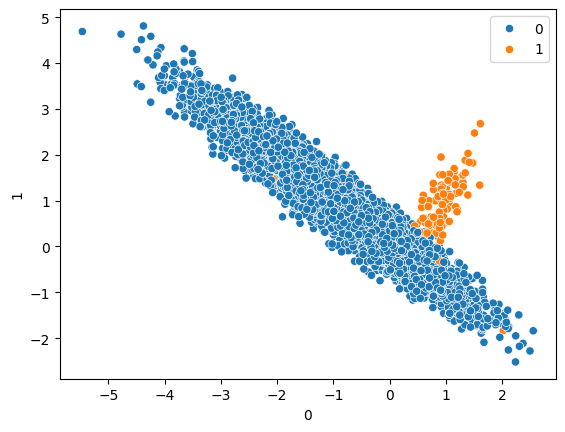

In [89]:
df_X = pd.DataFrame(X)
sns.scatterplot(x=df_X[0], y=df_X[1], hue=y)

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [92]:
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [93]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [94]:
## Hyperparamter tuning
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [95]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [96]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [98]:
grid.fit(X_train,y_train)

C:\Users\HP-PC\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP-PC\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP-PC\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP-PC\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP-PC\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP-PC\

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [102]:
print(f"Best parameters: {grid.best_params_}")

Best parameters: {'C': 1.0, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'newton-cg'}


In [103]:
y_pred = grid.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.99467
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2953
           1       0.97      0.68      0.80        47

    accuracy                           0.99      3000
   macro avg       0.98      0.84      0.90      3000
weighted avg       0.99      0.99      0.99      3000

[[2952    1]
 [  15   32]]


## Logistic Regression With ROC curve And ROC AUC score

In [105]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [106]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [109]:
# Created a dummy model with default 0 as output 
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [110]:
## Lets Create Basic Logistic Model
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [111]:
## Prediction based on probability
model_prob=model.predict_proba(X_test)
model_prob

array([[3.90463328e-01, 6.09536672e-01],
       [1.31070740e-01, 8.68929260e-01],
       [4.86090535e-01, 5.13909465e-01],
       [2.20910617e-01, 7.79089383e-01],
       [4.62763436e-02, 9.53723656e-01],
       [9.47654807e-01, 5.23451932e-02],
       [7.72363239e-01, 2.27636761e-01],
       [2.10652946e-01, 7.89347054e-01],
       [2.62962545e-01, 7.37037455e-01],
       [6.87582346e-01, 3.12417654e-01],
       [3.35752421e-02, 9.66424758e-01],
       [3.29170508e-01, 6.70829492e-01],
       [9.95910519e-01, 4.08948143e-03],
       [5.00693064e-01, 4.99306936e-01],
       [2.80327289e-01, 7.19672711e-01],
       [8.20394408e-01, 1.79605592e-01],
       [9.35541003e-01, 6.44589971e-02],
       [4.87080427e-02, 9.51291957e-01],
       [1.12369089e-01, 8.87630911e-01],
       [5.21312907e-01, 4.78687093e-01],
       [5.65232790e-03, 9.94347672e-01],
       [7.44918172e-01, 2.55081828e-01],
       [9.48559833e-01, 5.14401674e-02],
       [8.97235307e-01, 1.02764693e-01],
       [2.130755

In [112]:
## Lets focus on the positive outcome
model_prob=model_prob[:,1]

In [113]:

## Lets calulcate the scores
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9141713014460511


In [114]:
## calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [115]:
thresholds

array([           inf, 9.99903312e-01, 9.60819585e-01, 9.60673656e-01,
       9.42928905e-01, 9.37634035e-01, 9.35829937e-01, 9.35196941e-01,
       9.33388706e-01, 9.31568682e-01, 9.19898462e-01, 9.18320734e-01,
       9.08848834e-01, 9.04149376e-01, 8.68929260e-01, 8.68816110e-01,
       8.59454363e-01, 8.57330834e-01, 7.66609556e-01, 7.56307961e-01,
       7.47504157e-01, 7.44341554e-01, 7.38336625e-01, 7.35803961e-01,
       7.28263642e-01, 7.19672711e-01, 6.70517119e-01, 6.64080329e-01,
       5.97992204e-01, 5.63115004e-01, 5.61146495e-01, 5.42332260e-01,
       5.33104469e-01, 5.18849321e-01, 4.67721242e-01, 4.66279420e-01,
       4.53793669e-01, 4.43620311e-01, 4.30357018e-01, 4.30169935e-01,
       4.29200970e-01, 3.96059977e-01, 3.47982821e-01, 3.34198768e-01,
       3.28119070e-01, 3.07874692e-01, 2.95655789e-01, 2.40142099e-01,
       2.39704326e-01, 1.97988953e-01, 1.92236077e-01, 1.72072589e-01,
       1.68324514e-01, 1.44381585e-01, 1.41194398e-01, 1.36275906e-01,
      

In [116]:
model_fpr,model_tpr

(array([0.        , 0.        , 0.        , 0.00689655, 0.00689655,
        0.0137931 , 0.0137931 , 0.02068966, 0.02068966, 0.02758621,
        0.02758621, 0.03448276, 0.03448276, 0.04137931, 0.04137931,
        0.04827586, 0.04827586, 0.05517241, 0.05517241, 0.06206897,
        0.06206897, 0.07586207, 0.07586207, 0.08965517, 0.08965517,
        0.09655172, 0.09655172, 0.10344828, 0.10344828, 0.11034483,
        0.11034483, 0.11724138, 0.11724138, 0.12413793, 0.12413793,
        0.13103448, 0.13103448, 0.13793103, 0.13793103, 0.14482759,
        0.14482759, 0.17931034, 0.17931034, 0.19310345, 0.19310345,
        0.2137931 , 0.2137931 , 0.28275862, 0.28275862, 0.33103448,
        0.33103448, 0.34482759, 0.34482759, 0.4137931 , 0.4137931 ,
        0.43448276, 0.43448276, 0.48965517, 0.48965517, 0.55172414,
        0.55172414, 0.55862069, 0.55862069, 0.60689655, 0.60689655,
        0.64137931, 0.64137931, 0.8       , 0.8       , 0.90344828,
        0.90344828, 0.91034483, 0.91034483, 1.  

In [117]:
import seaborn as sns

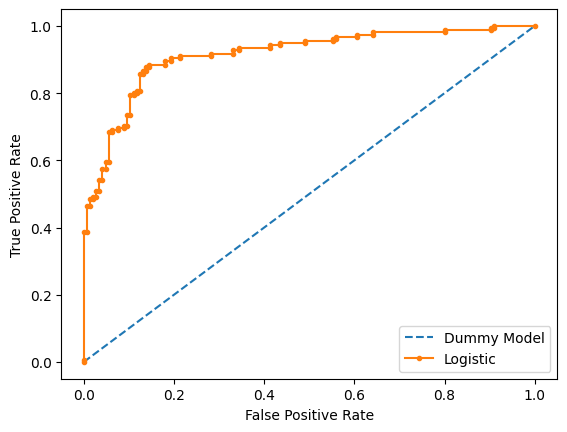

In [118]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

C:\Users\HP-PC\AppData\Local\Temp\ipykernel_10764\3085575909.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


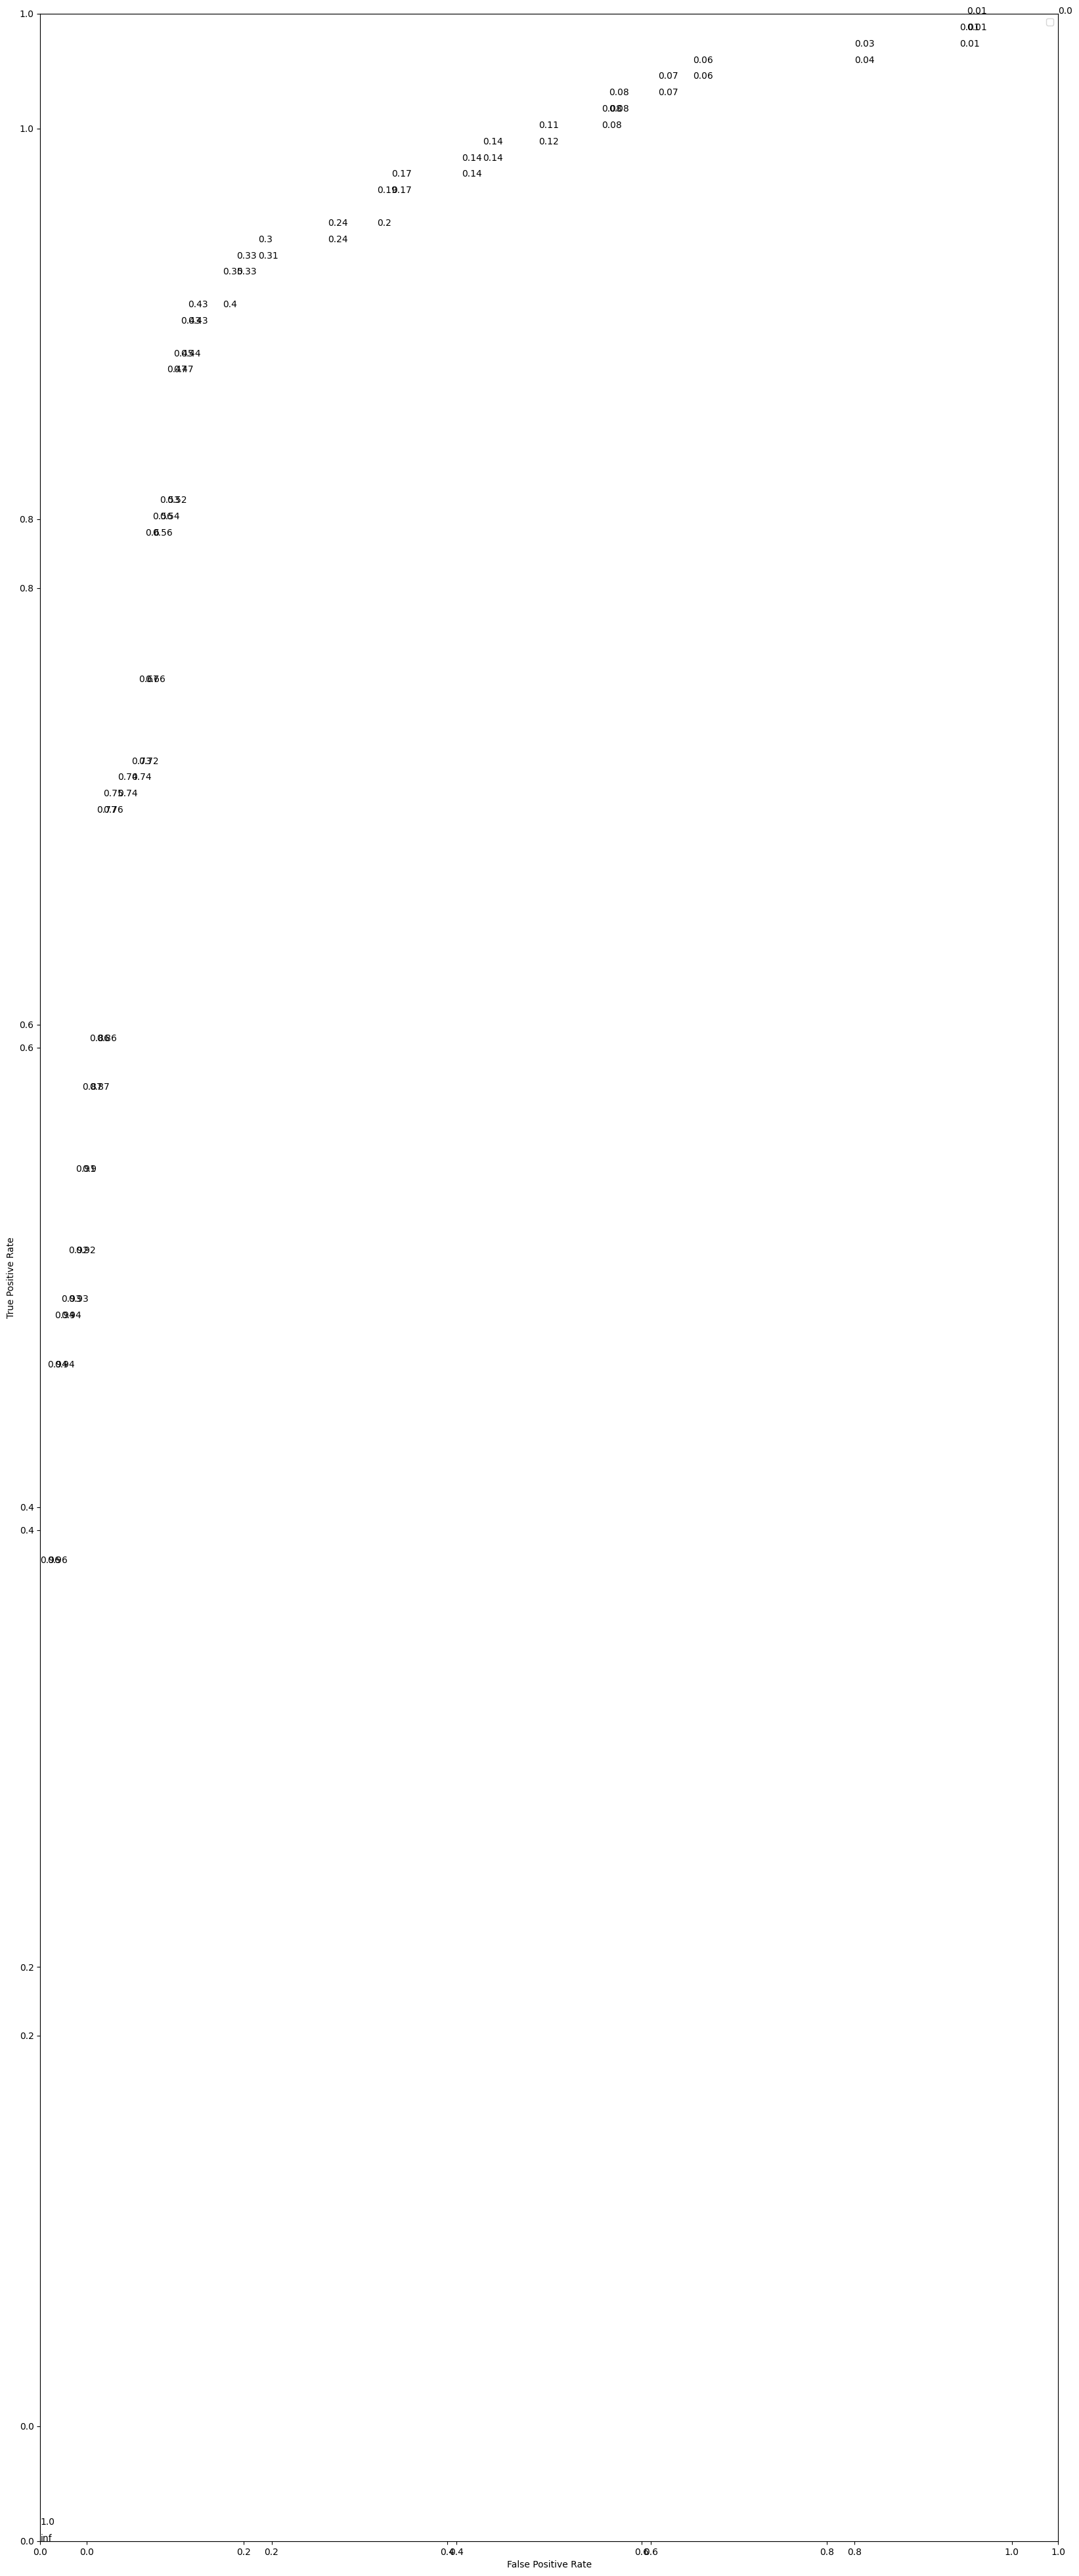

In [119]:
# plot the roc curve for the model
import numpy as np
from matplotlib import pyplot

fig = pyplot.figure(figsize=(20, 50))  # Adjusted figure size for better visualization
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Add annotations for thresholds
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr, thresholds):   
    ax.annotate('%s' % np.round(xyz[2], 2), xy=(xyz[0], xyz[1]))

# Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# Show the legend
pyplot.legend()

# Show the plot
pyplot.show()